# Analyse graphique de la dynamique epidemique du COVID-19 en France

> Visualisation des variations de vitesse de propagation de l'épidémie dans le temps.

- toc: true
- branch: master
- hide: false
- search_exclude: false
- badges: true
- comments: false
- author: Alexandre Payot
- categories: [Visualisation, Data, Covid]

Ce post présente la dynamique de l'épidémie et propose des graphiques montrant différentes normalisations des données permettant de mesurer les variations de la vitesse de propagation du virus.

J'ai commencé ce projet en avril 2020, lorsque la dynamique de l'épidémie était très incertaine, durant le confinement en France. Mon objectif est de mettre à jour les données toutes les semaines pour permettre un suivi des chiffres loin du sensationnalisme et des sous-estimations que l'on peut retrouver dans les médias.

Dans ce contexte, l'accent est mis sur les données moyennées sur 7 jours, ce qui permet de lisser les fluctuations importantes que l'on observe entre les différents jours de la semaine. Vous retrouverez le code utilisé à l'addresse suivante: 
[payoto/covid19-viz](https://github.com/payoto/covid19-viz)

In [1]:
#hide
%load_ext autoreload
%autoreload 2

In [2]:
#collapse-hide
import pandas as pd
from matplotlib import pyplot as plt
import requests
import datetime
from IPython.display import display, Markdown

In [3]:
display(Markdown("Article mis à jour le {}".format(datetime.date.today().strftime("%d/%m/%Y"))))

Article mis à jour le 20/09/2020

## Mise à jour des commentaires

### Le 20/09/2020

Deux points importants apparaissent dans les données:

* L'augmentation du nombre de personne en réanimation et hopital semble se stabiliser autour de +5% par jour (doublement toutes les deux semaines);
* Sans surprise, les tendances en réanimations et hospitalisations commence à ce repérer dans les courbes de décès.

In [4]:
from viz import *

## Données de DataAgainst Covid-19

Les données utilisées sont celles de DataAgainst COVID-19 (aka opencovid19-fr) [github.com/opencovid19-fr/data]. Elles sont mises à jour quotidiennement.

In [5]:
#collapse-hide
file_name = 'opencovid19-fr-chiffres-cles.csv'
url = 'https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv'
myfile = requests.get(url)
open(file_name, 'wb').write(myfile.content)
data = pd.read_csv('opencovid19-fr-chiffres-cles.csv')

In [6]:
#hide
data.columns

Index(['date', 'granularite', 'maille_code', 'maille_nom', 'cas_confirmes',
       'cas_ehpad', 'cas_confirmes_ehpad', 'cas_possibles_ehpad', 'deces',
       'deces_ehpad', 'reanimation', 'hospitalises',
       'nouvelles_hospitalisations', 'nouvelles_reanimations', 'gueris',
       'depistes', 'source_nom', 'source_url', 'source_archive',
       'source_type'],
      dtype='object')

In [7]:
data.tail()

date granularite maille_code                  maille_nom  \
25940  2020-09-19      region      REG-75          Nouvelle-Aquitaine   
25941  2020-09-19      region      REG-76                   Occitanie   
25942  2020-09-19      region      REG-84        Auvergne-Rhône-Alpes   
25943  2020-09-19      region      REG-93  Provence-Alpes-Côte d'Azur   
25944  2020-09-19      region      REG-94                       Corse   

       cas_confirmes  cas_ehpad  cas_confirmes_ehpad  cas_possibles_ehpad  \
25940            NaN        NaN                  NaN                  NaN   
25941            NaN        NaN                  NaN                  NaN   
25942            NaN        NaN                  NaN                  NaN   
25943            NaN        NaN                  NaN                  NaN   
25944            NaN        NaN                  NaN                  NaN   

        deces  deces_ehpad  reanimation  hospitalises  \
25940   457.0          NaN         51.0         260.0   
25941   561.0          NaN         71.0         299.0   
25942  1836.0          NaN        106.0         696.0   
25943  1075.0          NaN        147.0         717.0   
25944    62.0          NaN          5.0          23.0   

       nouvelles_hospitalisations  nouvelles_reanimations  gueris  depistes  \
25940                        25.0                     3.0  2551.0       NaN   
25941                        20.0                     7.0  3453.0       NaN   
25942                        51.0                    14.0  8911.0       NaN   
25943                        60.0                     9.0  7382.0       NaN   
25944                         5.0                     1.0   282.0       NaN   

           source_nom source_url source_archive     source_type  
25940  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
25941  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
25942  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
25943  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
25944  OpenCOVID19-fr        NaN            NaN  opencovid19-fr

In [8]:
#hide
for a in data[["maille_code", "maille_nom"]].groupby(["maille_code", "maille_nom"]):
    print(f"{a[0]}")

('COM-974', 'La Réunion')
('COM-977', 'Saint-Barthélemy')
('COM-978', 'Saint-Martin')
('COM-986', 'Wallis et Futuna')
('COM-987', 'Polynésie française')
('COM-988', 'Nouvelle-Calédonie')
('DEP-01', 'Ain')
('DEP-02', 'Aisne')
('DEP-03', 'Allier')
('DEP-04', 'Alpes-de-Haute-Provence')
('DEP-05', 'Hautes-Alpes')
('DEP-06', 'Alpes-Maritimes')
('DEP-07', 'Ardèche')
('DEP-08', 'Ardennes')
('DEP-09', 'Ariège')
('DEP-10', 'Aube')
('DEP-11', 'Aude')
('DEP-12', 'Aveyron')
('DEP-13', 'Bouches-du-Rhône')
('DEP-14', 'Calvados')
('DEP-15', 'Cantal')
('DEP-16', 'Charente')
('DEP-17', 'Charente-Maritime')
('DEP-18', 'Cher')
('DEP-19', 'Corrèze')
('DEP-21', "Côte-d'Or")
('DEP-22', "Côtes-d'Armor")
('DEP-23', 'Creuse')
('DEP-24', 'Dordogne')
('DEP-25', 'Doubs')
('DEP-26', 'Drôme')
('DEP-27', 'Eure')
('DEP-28', 'Eure-et-Loir')
('DEP-29', 'Finistère')
('DEP-2A', 'Corse-du-Sud')
('DEP-2B', 'Haute-Corse')
('DEP-30', 'Gard')
('DEP-31', 'Haute-Garonne')
('DEP-32', 'Gers')
('DEP-33', 'Gironde')
('DEP-34', 'Hér

In [9]:
data = enable_time_series_plot(data, timein_field="date", timeseries_field_out="t")

## Dernières données pour la France

Ici, nous tabulons les derniers jours de données pour la France. Les données brutes ainsi que les données avec une moyenne glissante sur 7 jours sont calculées. Nous n'observons que les réanimations, les hospitalisation et les décès. Les données de cas confirmés ont longtemps été insuffisantes pour permettre une analyse intelligente de l'épidémie.

Dans les graphiques ci-après nous trois types de données:

* les données brutes d'entrées en réanimation et de décès;
* ces même données moyennées sur 7 jours;
* ces données moyennées normalisée par le nombre de personnes en réanimation.

Ce troisième graphique donne donc une indication de l'accéleration ou ralentissement, même lorsque les données sont d'ampleurs très différentes.

deces  deces_ehpad  reanimation  hospitalises  \
t                                                             
2020-09-09  20319.0      10475.0        599.0        5003.0   
2020-09-10  20338.0      10475.0        615.0        5096.0   
2020-09-11  20378.0      10515.0        635.0        5155.0   
2020-09-12  20395.0      10515.0        662.0        5195.0   
2020-09-13  20401.0      10515.0        669.0        5247.0   
2020-09-14  20435.0      10515.0        712.0        5498.0   
2020-09-15  20471.0      10528.0        759.0        5679.0   
2020-09-16  20517.0      10528.0        803.0        5819.0   
2020-09-17  20567.0      10528.0        800.0        5844.0   
2020-09-18  20689.0      10560.0        827.0        5819.0   

            reanimation_cumul  hospitalises_cumul  deces_jour  \
t                                                               
2020-09-09           351026.0           2404565.0        30.0   
2020-09-10           351641.0           2409661.0        19.0   
2020-09-11           352276.0           2414816.0        40.0   
2020-09-12           352938.0           2420011.0        17.0   
2020-09-13           353607.0           2425258.0         6.0   
2020-09-14           354319.0           2430756.0        34.0   
2020-09-15           355078.0           2436435.0        36.0   
2020-09-16           355881.0           2442254.0        46.0   
2020-09-17           356681.0           2448098.0        50.0   
2020-09-18           357508.0           2453917.0       122.0   

            deces_jour_jour  deces_ehpad_jour  deces_ehpad_jour_jour  ...  \
t                                                                     ...   
2020-09-09             -9.0               0.0                    0.0  ...   
2020-09-10            -11.0               0.0                    0.0  ...   
2020-09-11             21.0              40.0                   40.0  ...   
2020-09-12            -23.0               0.0                  -40.0  ...   
2020-09-13            -11.0               0.0                    0.0  ...   
2020-09-14             28.0               0.0                    0.0  ...   
2020-09-15              2.0              13.0                   13.0  ...   
2020-09-16             10.0               0.0                  -13.0  ...   
2020-09-17              4.0               0.0                    0.0  ...   
2020-09-18             72.0              32.0                   32.0  ...   

            deces_jour_mma_jour  deces_ehpad_jour_mma_jour  deces_jour_prop  \
t                                                                             
2020-09-09             0.714286                   0.000000         0.001034   
2020-09-10            -0.142857                   0.000000         0.001026   
2020-09-11             3.142857                   5.714286         0.001178   
2020-09-12             0.714286                   0.000000         0.001212   
2020-09-13             0.428571                   0.000000         0.001232   
2020-09-14             1.285714                   0.000000         0.001293   
2020-09-15            -0.428571                   1.857143         0.001270   
2020-09-16             2.285714                   0.000000         0.001379   
2020-09-17             4.428571                   0.000000         0.001591   
2020-09-18            11.714286                  -1.142857         0.002147   

            deces_ehpad_jour_prop  reanimation_jour_prop  \
t                                                          
2020-09-09               0.000000               0.036489   
2020-09-10               0.000000               0.035075   
2020-09-11               0.000543               0.036445   
2020-09-12               0.000543               0.038843   
2020-09-13               0.000543               0.039078   
2020-09-14               0.000543               0.035112   
2020-09-15               0.000719               0.034820   
2020-09-16               0.000719               0.036292   
20

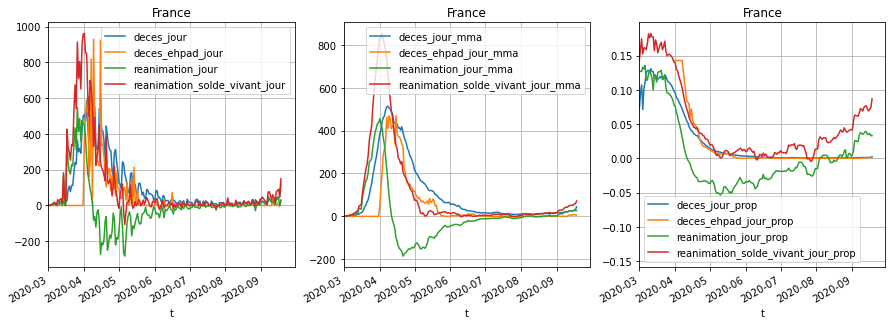

In [10]:
#collapse-hide

maille_active = 'FRA'
fra = oc19_data_preproc(data, maille_active)
fra.tail(10)

## Dynamique de l'épidemie

Dans les graphiques qui suivent nous regardons sur l'axe des abscisses le nombre de personnes dans un états de maladie covid donnée. Vous retrouvez ces valeurs sur le graphique de gauche.

Au milieu, l'axe des ordonnées représente le changement de jour en jour de l'axe des abscisses, les points indique les données brutes, et la ligne les données moyennées.

A droite, ces mêmes données de l'axe des ordonnées sont normalisées pour indiquer un changement en pourcents par jour.

Chaque couleur correspond à une semaine.

In [11]:
#collapse-hide
def plots_maille_code(maille_active='FRA'):
    fra = oc19_data_preproc(data, maille_active)
    plt.close()
    # plot_field_loops(fra, "deces_ehpad", center=False, maille_active=maille_active)
    plot_field_loops(fra, "hospitalises_cumul", [7], center=True, maille_active=maille_active)
    plot_field_loops(fra, "reanimation_cumul", [7], center=True, maille_active=maille_active)
    plot_field_loops(fra, "deces", center=False, maille_active=maille_active)


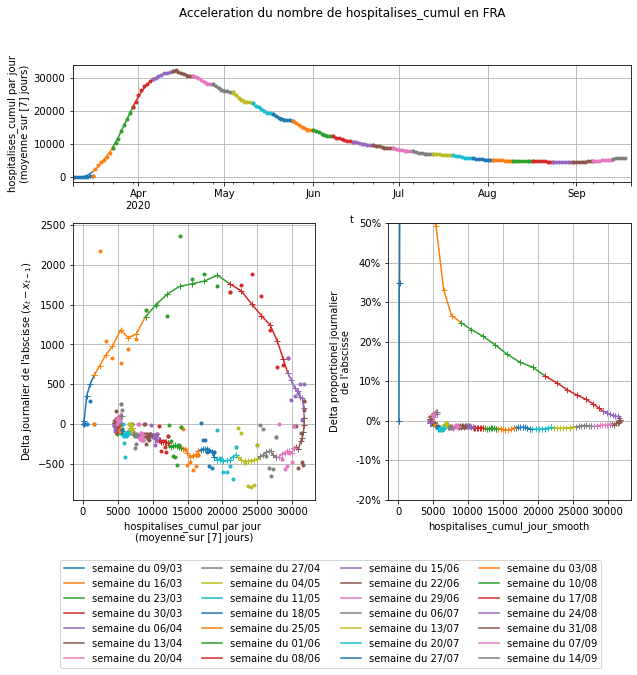

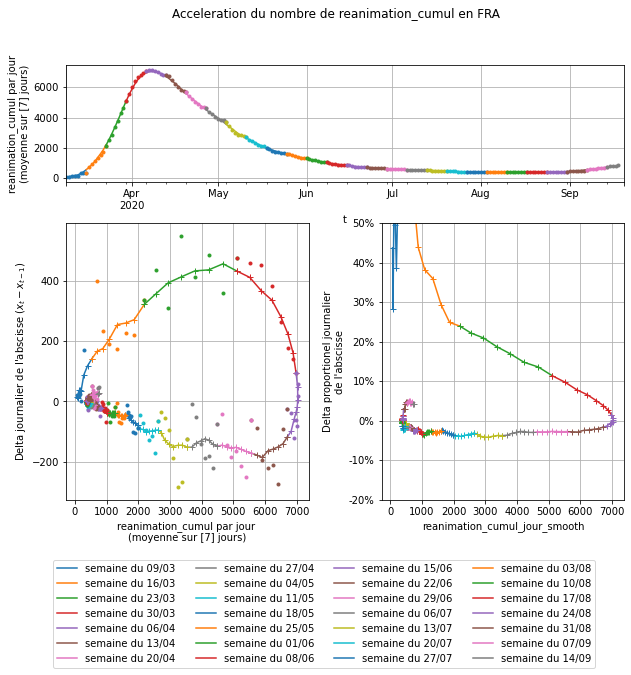

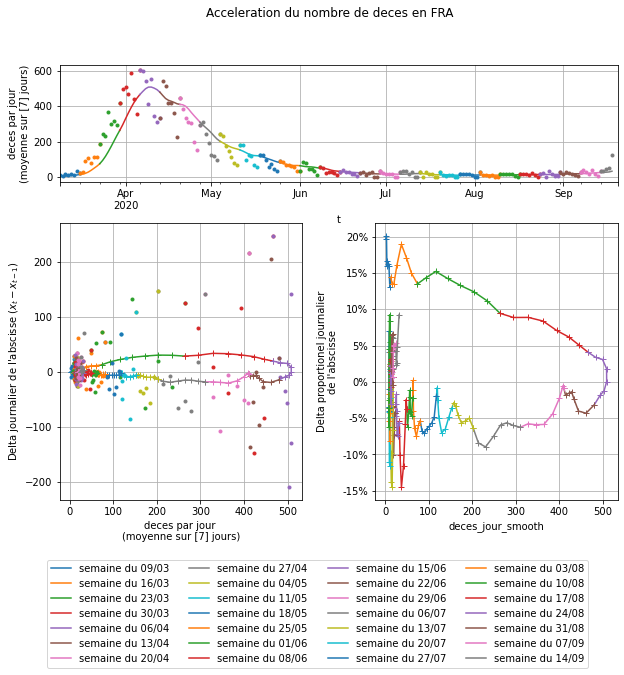

In [12]:
plots_maille_code(maille_active='FRA')

Ces courbes évoluent en boucles (ou en spirale en cas de plusieurs vagues successivent):

* Au debut de l'épidémie les courbes commencent à l'origine;
* puis se suit une accélération rapide dans la partie supérieure du graphique;
* avec le confinement l'augementation de jour en jour ralenti, cela se voit à la pente négative dès la semaine du 23 Mars;
* l'épidémie atteint son pic la semaine du 06 Avril;
* Nous voyons ensuite une réduction stable autour de 5% par jour jusqu'à la semaine du 08 Juin;
* La période estivale indique bien que l'épidémie n'allait pas disparaître car ne retournant pas à l'origine;
* depuis le 15 Août le nombre de d'hospitalisations et de réanimation s'acroit et c'est la deuxième semaine de Septembre qui semble indiqué qu'une deuxième vague a commencé.

Une deuxième vague se manifestera comme une spirale dans les graphique au dessus.

### Dynamique en Ile de France

Ici les mêmes graphiques sont présentés pour l'île de France. 

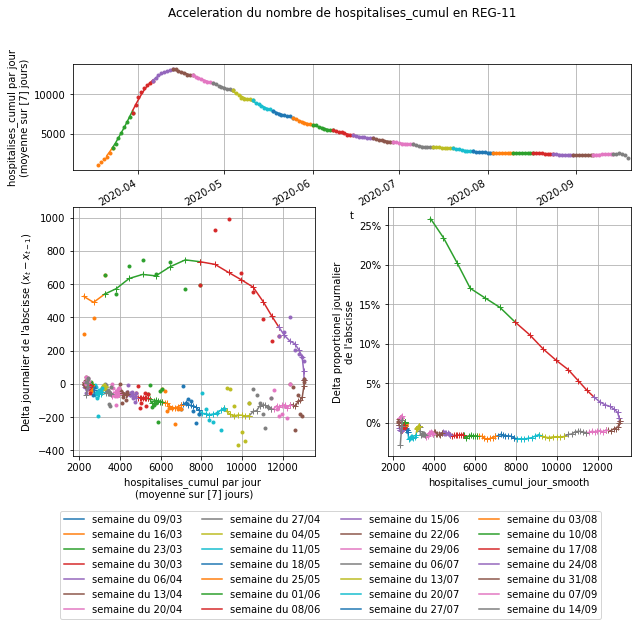

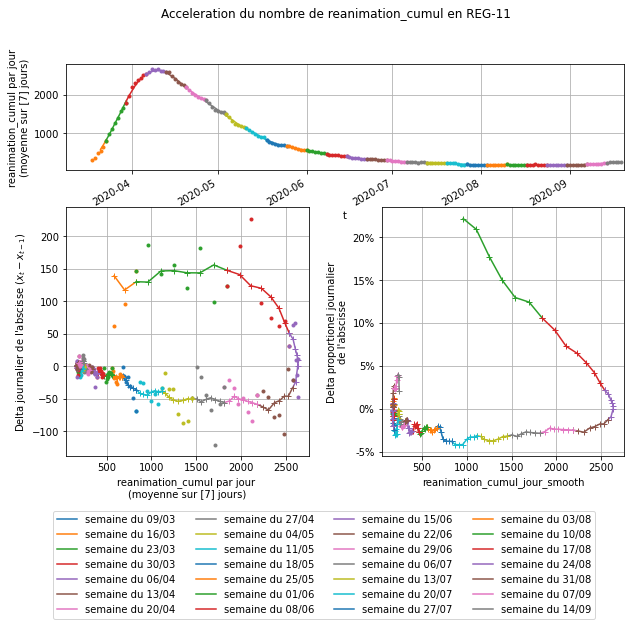

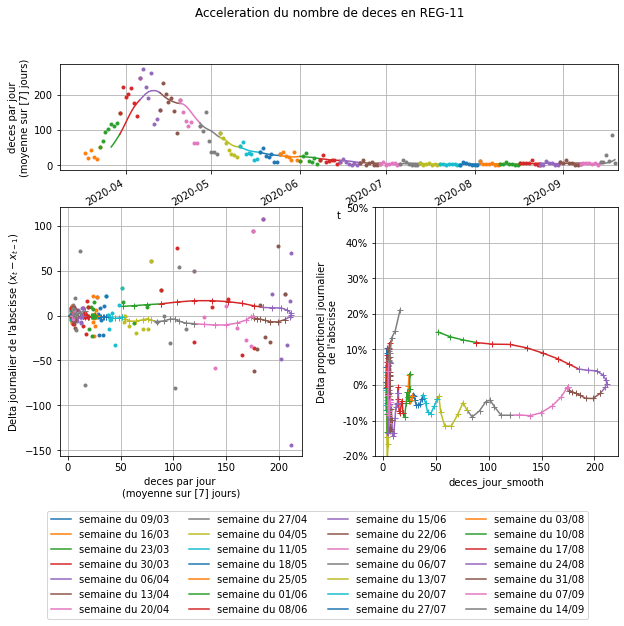

In [13]:
plots_maille_code(maille_active='REG-11')

## Graphes par regions

Pour chaque région les nombres de réanimation et de décès ainsi que leur dynamique sont
présentées ci-dessous.

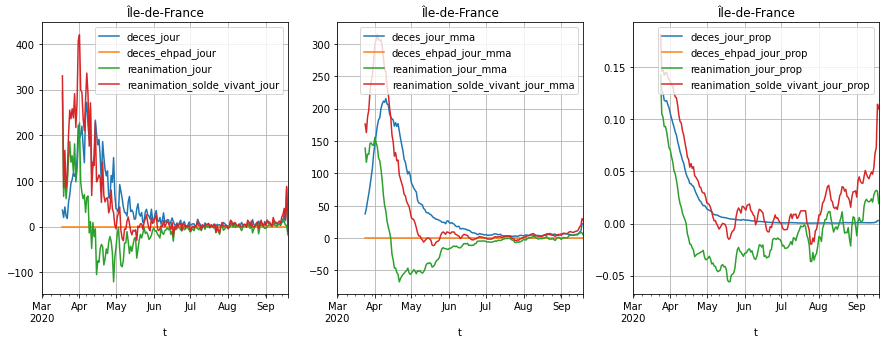

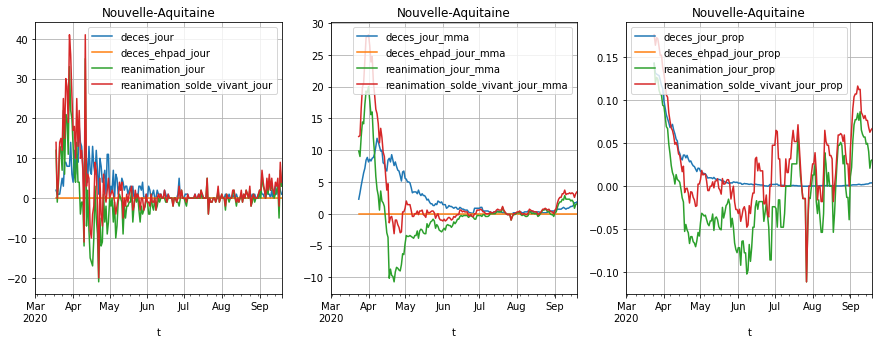

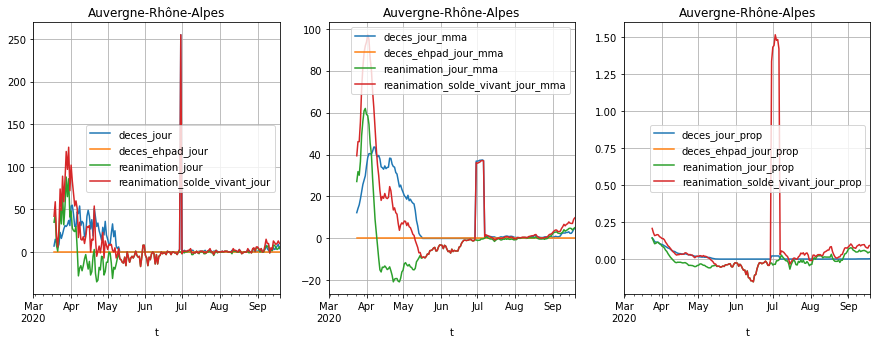

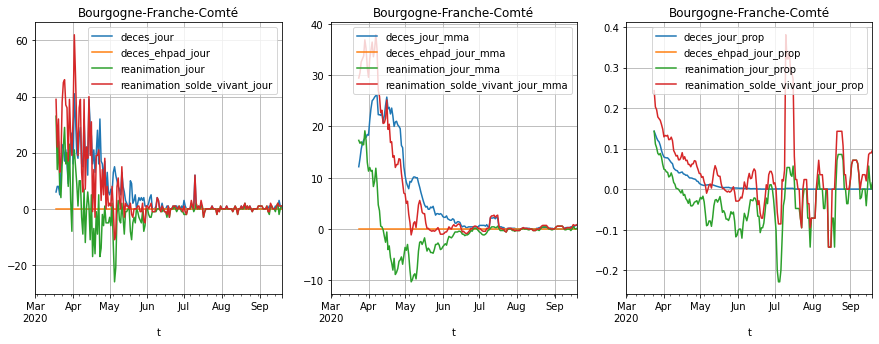

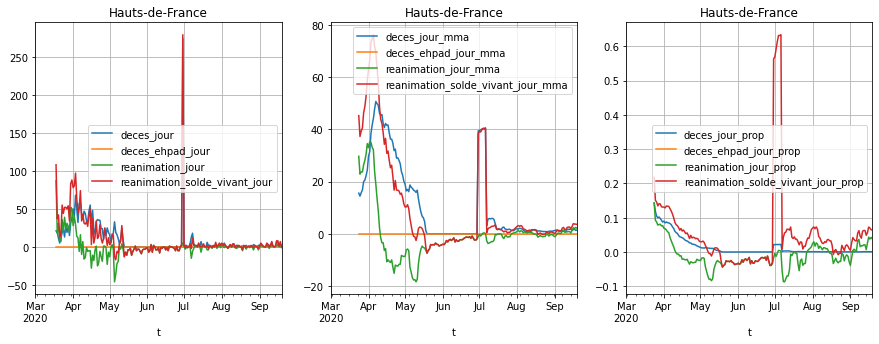

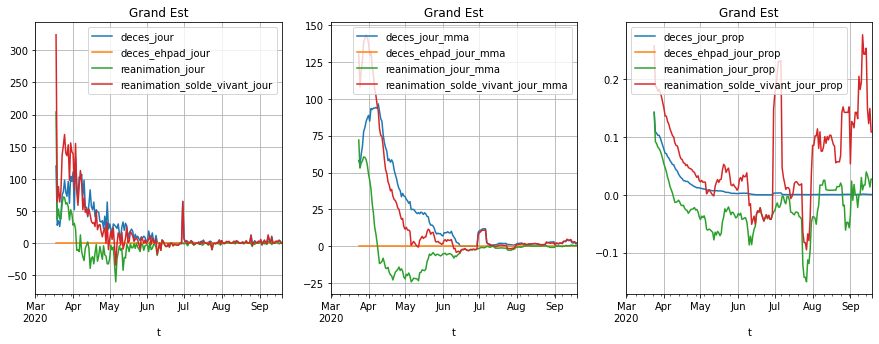

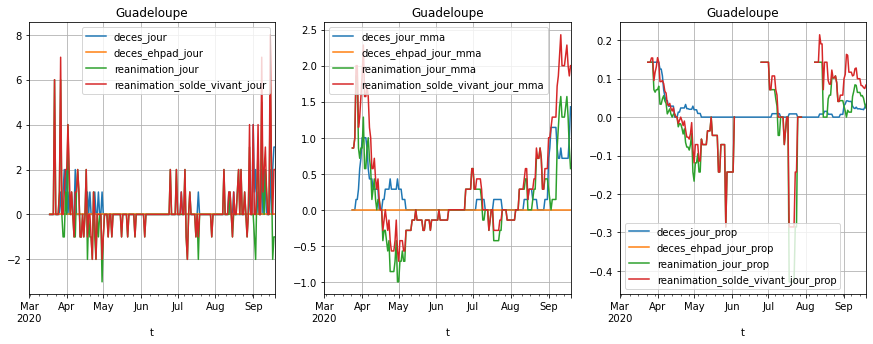

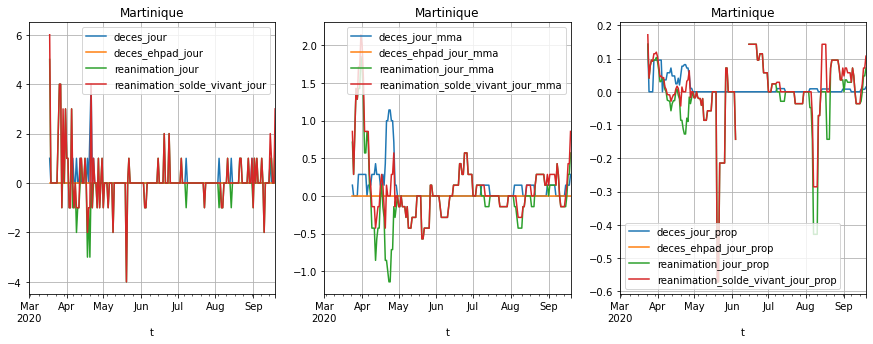

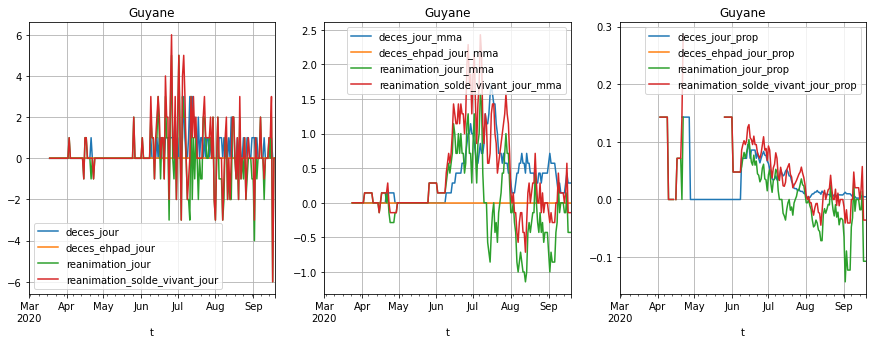

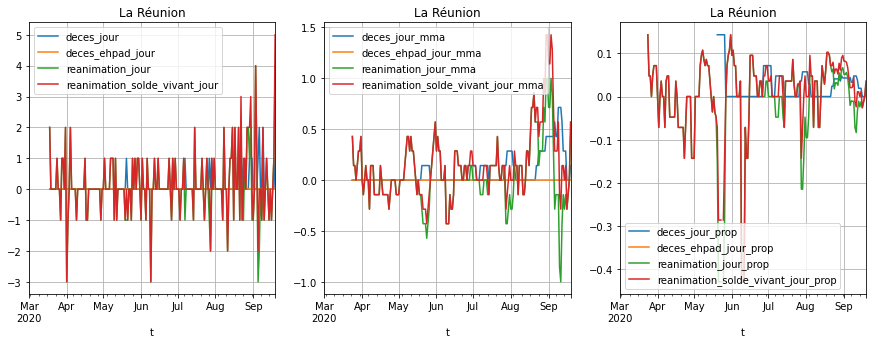

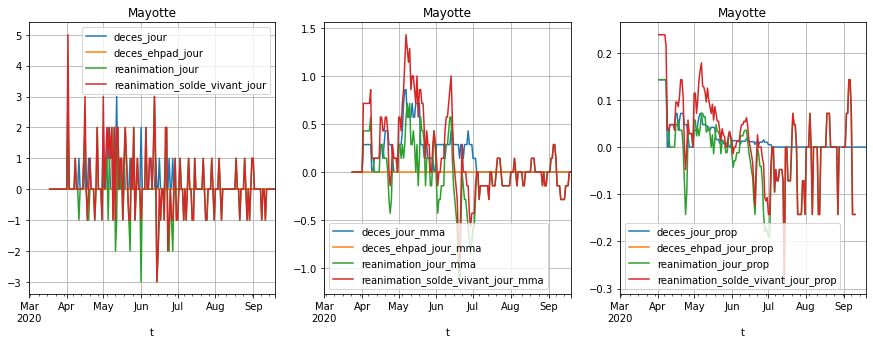

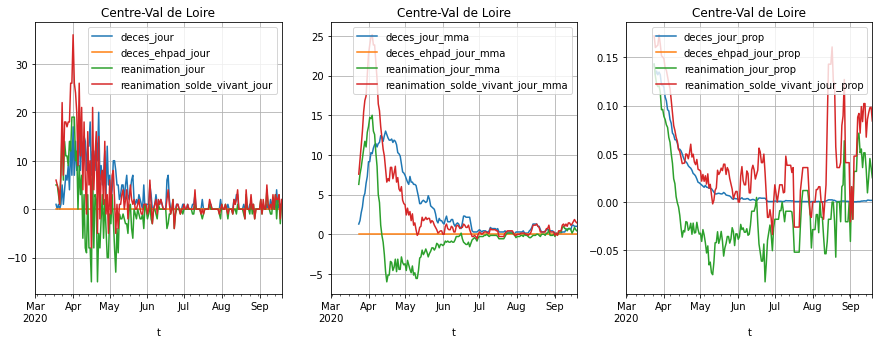

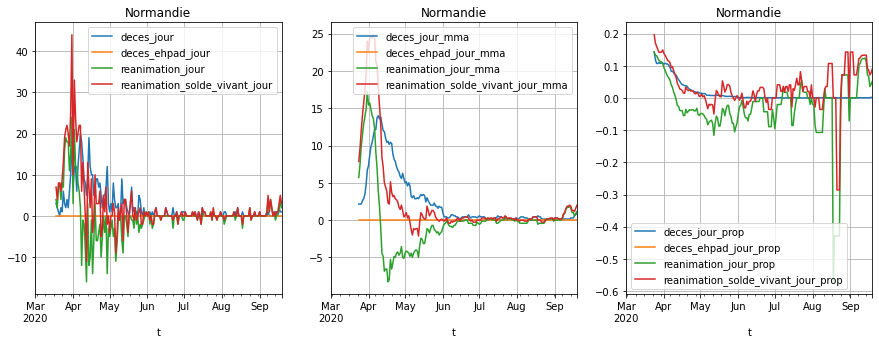

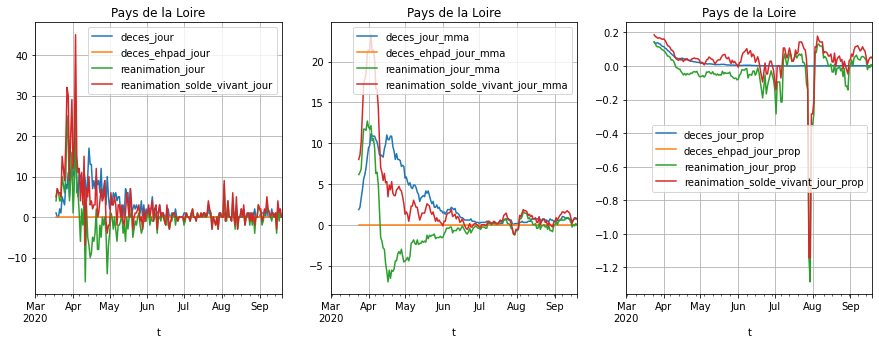

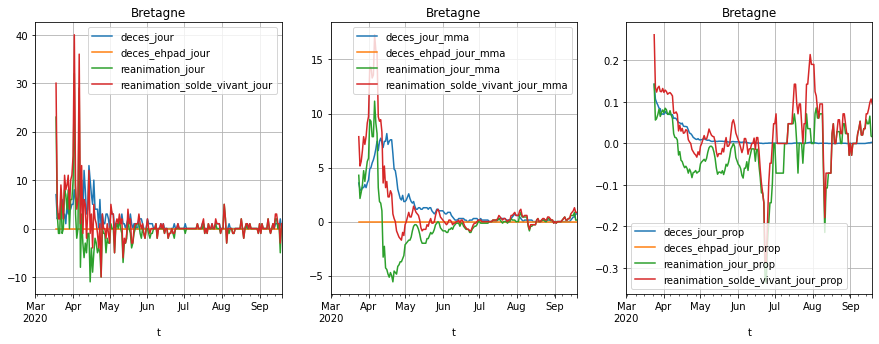

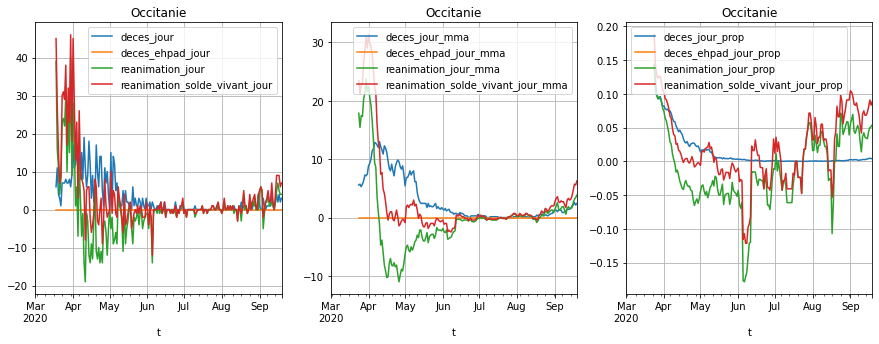

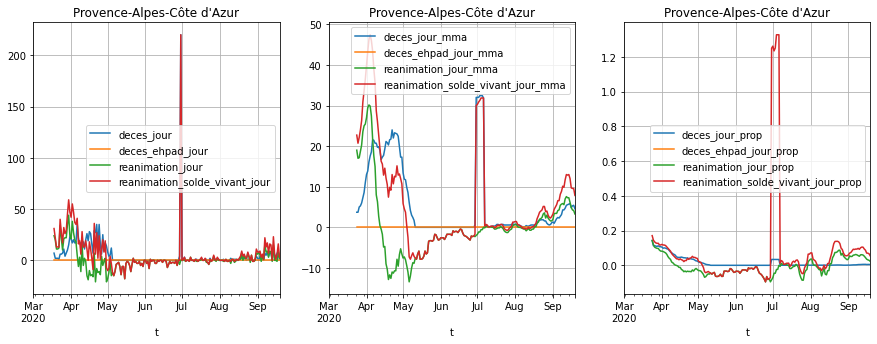

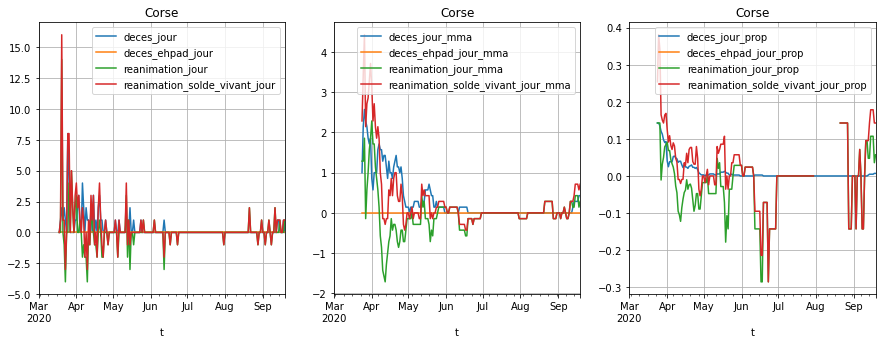

In [14]:
list_reg = [r for r in data["maille_code"].unique() if "REG" in r]
for reg in list_reg:
    oc19_data_preproc(data, reg)